# Exploration des données et Dataviz - Trafic Cycliste

## Imports et chargement des données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime

In [2]:
df_2023 = pd.read_csv('../data/raw/2023-comptage-velo-donnees-compteurs.csv', sep=';')
df_2024 = pd.read_csv('../data/raw/2024-comptage-velo-donnees-compteurs.csv', sep=';')

In [3]:
df = pd.concat([df_2023, df_2024], axis=0)

In [4]:
df.head()

Identifiant du compteur                    Nom du compteur  \
0     100003096-353242251  97 avenue Denfert Rochereau SO-NE   
1     100003096-353242251  97 avenue Denfert Rochereau SO-NE   
2     100003096-353242251  97 avenue Denfert Rochereau SO-NE   
3     100003096-353242251  97 avenue Denfert Rochereau SO-NE   
4     100003096-353242251  97 avenue Denfert Rochereau SO-NE   

   Identifiant du site de comptage      Nom du site de comptage  \
0                      100003096.0  97 avenue Denfert Rochereau   
1                      100003096.0  97 avenue Denfert Rochereau   
2                      100003096.0  97 avenue Denfert Rochereau   
3                      100003096.0  97 avenue Denfert Rochereau   
4                      100003096.0  97 avenue Denfert Rochereau   

   Comptage horaire  Date et heure de comptage  \
0                 4  2023-01-01T07:00:00+01:00   
1                14  2023-01-01T04:00:00+01:00   
2                10  2023-01-01T09:00:00+01:00   
3                25  2023-01-01T16:00:00+01:00   
4                14  2023-01-01T05:00:00+01:00   

  Date d'installation du site de comptage  \
0                              2012-02-22   
1                              2012-02-22   
2                              2012-02-22   
3                              2012-02-22   
4                              2012-02-22   

                 Lien vers photo du site de comptage  \
0  https://filer.eco-counter-tools.com/file/93/e7...   
1  https://filer.eco-counter-tools.com/file/93/e7...   
2  https://filer.eco-counter-tools.com/file/93/e7...   
3  https://filer.eco-counter-tools.com/file/93/e7...   
4  https://filer.eco-counter-tools.com/file/93/e7...   

  Coordonnées géographiques Identifiant technique compteur  \
0         48.83504, 2.33314                    Y2H21111072   
1         48.83504, 2.33314                    Y2H21111072   
2         48.83504, 2.33314                    Y2H21111072   
3         48.83504, 2.33314                    Y2H21111072   
4         48.83504, 2.33314                    Y2H21111072   

                                           ID Photos  \
0  https://filer.eco-counter-tools.com/file/93/e7...   
1  https://filer.eco-counter-tools.com/file/93/e7...   
2  https://filer.eco-counter-tools.com/file/93/e7...   
3  https://filer.eco-counter-tools.com/file/93/e7...   
4  https://filer.eco-counter-tools.com/file/93/e7...   

          test_lien_vers_photos_du_site_de_comptage_ id_photo_1  \
0  https://filer.eco-counter-tools.com/file/93/e7...     https:   
1  https://filer.eco-counter-tools.com/file/93/e7...     https:   
2  https://filer.eco-counter-tools.com/file/93/e7...     https:   
3  https://filer.eco-counter-tools.com/file/93/e7...     https:   
4  https://filer.eco-counter-tools.com/file/93/e7...     https:   

                                    url_sites type_dimage mois_annee_comptage  
0  https://www.eco-visio.net/Photos/100003096         jpg             2023-01  
1  https://www.eco-visio.net/Photos/100003096         jpg             2023-01  
2  https://www.eco-visio.net/Photos/100003096         jpg             2023-01  
3  https://www.eco-visio.net/Photos/100003096         jpg             2023-01  
4  https://www.eco-visio.net/Photos/100003096         jpg             2023-01

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1799534 entries, 0 to 939343
Data columns (total 16 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   Identifiant du compteur                     object 
 1   Nom du compteur                             object 
 2   Identifiant du site de comptage             float64
 3   Nom du site de comptage                     object 
 4   Comptage horaire                            int64  
 5   Date et heure de comptage                   object 
 6   Date d'installation du site de comptage     object 
 7   Lien vers photo du site de comptage         object 
 8   Coordonnées géographiques                   object 
 9   Identifiant technique compteur              object 
 10  ID Photos                                   object 
 11  test_lien_vers_photos_du_site_de_comptage_  object 
 12  id_photo_1                                  object 
 13  url_sites                        

## Analyse des variables

In [6]:
df['Comptage horaire'].describe()

count    1.799534e+06
mean     7.585383e+01
std      1.045537e+02
min      0.000000e+00
25%      1.100000e+01
50%      4.100000e+01
75%      9.500000e+01
max      8.190000e+03
Name: Comptage horaire, dtype: float64

In [7]:
len(df.loc[df['Comptage horaire'] <= 5])

291935

In [8]:
df["Identifiant du compteur"].nunique()

107

In [9]:
df["Nom du compteur"].nunique()

112

Il semble qu'il y ait une incohérence entre les "identifiants compteurs" et les "noms compteurs", on a pas le même nombre de valeurs.

In [10]:
df["Identifiant du site de comptage"].nunique()

74

In [11]:
df["Nom du site de comptage"].nunique()

71

Il semble qu'il y ait aussi une incohérence entre les "identifiants site de compte" et les "noms des sites de comptage".

In [12]:
df["Lien vers photo du site de comptage"].nunique()

126

In [13]:
df["Coordonnées géographiques"].nunique()

143

In [14]:
df["Identifiant technique compteur"].nunique()

78

In [15]:
df["Date d'installation du site de comptage"].nunique()

42

In [16]:
df["ID Photos"].nunique()

138

In [17]:
df["url_sites"].nunique()

74

In [18]:
df["id_photo_1"].unique()

array(['https:', nan], dtype=object)

In [19]:
df["type_dimage"].unique()

array(['jpg', nan], dtype=object)

In [20]:
df["mois_annee_comptage"].nunique()

30

In [21]:
df["Nom du compteur"].value_counts()

Nom du compteur
Pont National SO-NE                                                     18495
Face au 25 quai de l'Oise NE-SO                                         18495
Face au 25 quai de l'Oise SO-NE                                         18495
Face au 8 avenue de la porte de Charenton NO-SE                         18494
77 boulevard Richard Lenoir N-S                                         18494
                                                                        ...  
Quai des Tuileries Quai des Tuileries Vélos SE-NO                        1993
10 avenue de la Grande Armée 10 avenue de la Grande Armée [Bike IN]       805
100 rue La Fayette O-E                                                      1
10 avenue de la Grande Armée 10 avenue de la Grande Armée [Bike OUT]        1
21 boulevard Saint Michel S-N                                               1
Name: count, Length: 112, dtype: int64

On constate qu'il y a certaines erreurs dans la saisie des noms de compteurs.

Par exemple, `Quai des Tuileries Quai des Tuileries Vélos NO-SE` répète la rue 2x alors
qu'il y a également un compteur `Quai des Tuileries NO-SE` dans le dataset.

Il faudrait donc renommer/fusionner certaines entrées pour améliorer la qualité du dataset.

In [22]:
(df["Lien vers photo du site de comptage"] == df["test_lien_vers_photos_du_site_de_comptage_"]).sum()

1699957

La colonne `test_lien_vers_photos_du_site_de_comptage_` semble être inutile car doublon de `Lien vers photo du site de comptage`. 

On peut drop cette colonne, ainsi que les colonnes `ID Photos`, `id_photo_1`, `url_sites` et `type_dimage`, qui ne fonctionnent pas / ne semblent pas utiles.

In [23]:
df = df.drop(columns = ["Identifiant technique compteur", "ID Photos", "test_lien_vers_photos_du_site_de_comptage_", "id_photo_1", "url_sites", "type_dimage", "mois_annee_comptage", "Lien vers photo du site de comptage"])

## Analyse des NaN

In [24]:
df.isna().sum()

Identifiant du compteur                    61605
Nom du compteur                                0
Identifiant du site de comptage            61605
Nom du site de comptage                    61605
Comptage horaire                               0
Date et heure de comptage                      0
Date d'installation du site de comptage    61605
Coordonnées géographiques                  61605
dtype: int64

In [25]:
df.isna().sum()/len(df) * 100

Identifiant du compteur                    3.423386
Nom du compteur                            0.000000
Identifiant du site de comptage            3.423386
Nom du site de comptage                    3.423386
Comptage horaire                           0.000000
Date et heure de comptage                  0.000000
Date d'installation du site de comptage    3.423386
Coordonnées géographiques                  3.423386
dtype: float64

In [26]:
counts_na = df.loc[df["Identifiant du compteur"].isna(), 'Nom du compteur'].value_counts()
counts_na

Nom du compteur
10 avenue de la Grande Armée SE-NO                                      8892
27 quai de la Tournelle NO-SE                                           7603
27 quai de la Tournelle SE-NO                                           7603
Face au 48 quai de la marne NE-SO                                       7557
Face au 48 quai de la marne SO-NE                                       7515
Quai des Tuileries NO-SE                                                7507
Quai des Tuileries SE-NO                                                7507
Pont des Invalides N-S                                                  7420
10 avenue de la Grande Armée 10 avenue de la Grande Armée [Bike OUT]       1
Name: count, dtype: int64

Pour ces entrées, on remarque que le nombre d'observations est non négligable.

En outre, il y a possibilité d'enrichissement des données avec d'autres compteurs ayant des noms similaires (`Quai des Tuileries NO-SE` et `Quai des Tuileries Quai des Tuileries Vélos NO-SE` par ex)

In [27]:
cond = (df['Nom du compteur'] == 'Face au 48 quai de la marne NE-SO') & (df['Identifiant du compteur'].isna())
df.loc[cond, 'Identifiant du compteur'] = '100047542-103047542'
df.loc[cond, 'Identifiant du site de comptage'] = 100047542
df.loc[cond, 'Nom du site de comptage'] = 'Face au 48 quai de la marne'
df.loc[cond, "Date d'installation du site de comptage"] = '2018-11-29'
df.loc[cond, 'Coordonnées géographiques'] = '48.89128,2.38606'

In [28]:
cond = (df['Nom du compteur'] == 'Face au 48 quai de la marne SO-NE') & (df['Identifiant du compteur'].isna())
df.loc[cond, 'Identifiant du compteur'] = '100047542-104047542'
df.loc[cond, 'Identifiant du site de comptage'] = 100047542
df.loc[cond, 'Nom du site de comptage'] = 'Face au 48 quai de la marne'
df.loc[cond, "Date d'installation du site de comptage"] = '2018-11-29'
df.loc[cond, 'Coordonnées géographiques'] = '48.89128,2.38606'

In [29]:
cond = (df['Nom du compteur'] == 'Quai des Tuileries NO-SE') & (df['Identifiant du compteur'].isna())
df.loc[cond, 'Identifiant du compteur'] = '100056035-353266462'
df.loc[cond, 'Identifiant du site de comptage'] = 100056035
df.loc[cond, 'Nom du site de comptage'] = 'Quai des Tuileries'
df.loc[cond, "Date d'installation du site de comptage"] = '2021-05-18'
df.loc[cond, 'Coordonnées géographiques'] = '48.8635,2.32239'

In [30]:
cond = (df['Nom du compteur'] == 'Quai des Tuileries SE-NO') & (df['Identifiant du compteur'].isna())
df.loc[cond, 'Identifiant du compteur'] = '100056035-353266460'
df.loc[cond, 'Identifiant du site de comptage'] = 100056035
df.loc[cond, 'Nom du site de comptage'] = 'Quai des Tuileries'
df.loc[cond, "Date d'installation du site de comptage"] = '2021-05-18'
df.loc[cond, 'Coordonnées géographiques'] = '48.8635,2.32239'

In [31]:
cond = (df['Nom du compteur'] == 'Pont des Invalides N-S') & (df['Identifiant du compteur'].isna())
df.loc[cond, 'Identifiant du compteur'] = '100056223-101056223'
df.loc[cond, 'Identifiant du site de comptage'] = 100056223
df.loc[cond, 'Nom du site de comptage'] = 'Pont des Invalides'
df.loc[cond, "Date d'installation du site de comptage"] = '2019-11-07'
df.loc[cond, 'Coordonnées géographiques'] = '48.86281,2.31037'

In [32]:
cond = (df['Nom du compteur'] == '10 avenue de la Grande Armée SE-NO') & (df['Identifiant du compteur'].isna())
df.loc[cond, 'Identifiant du compteur'] = '100044494-353504987'
df.loc[cond, 'Identifiant du site de comptage'] = 100044494
df.loc[cond, 'Nom du site de comptage'] = '10 avenue de la Grande Armée'
df.loc[cond, "Date d'installation du site de comptage"] = '2018-07-27'
df.loc[cond, 'Coordonnées géographiques'] = '48.8748,2.2924'

In [33]:
cond = (df['Nom du compteur'] == '27 quai de la Tournelle NO-SE') & (df['Identifiant du compteur'].isna())
df.loc[cond, 'Identifiant du compteur'] = '100056336-104056336'
df.loc[cond, 'Identifiant du site de comptage'] = 100056336
df.loc[cond, 'Nom du site de comptage'] = '27 quai de la Tournelle'
df.loc[cond, "Date d'installation du site de comptage"] = '2019-11-14'
df.loc[cond, 'Coordonnées géographiques'] = '48.85013,2.35423'

In [34]:
cond = (df['Nom du compteur'] == '27 quai de la Tournelle SE-NO') & (df['Identifiant du compteur'].isna())
df.loc[cond, 'Identifiant du compteur'] = '100056336-103056336'
df.loc[cond, 'Identifiant du site de comptage'] = 100056336
df.loc[cond, 'Nom du site de comptage'] = '27 quai de la Tournelle'
df.loc[cond, "Date d'installation du site de comptage"] = '2019-11-14'
df.loc[cond, 'Coordonnées géographiques'] = '48.85013,2.35423'

In [35]:
df = df.drop(index=df.loc[df['Nom du compteur'] == '10 avenue de la Grande Armée 10 avenue de la Grande Armée [Bike IN]'].index)

In [36]:
df = df.drop(index=df.loc[df['Nom du compteur'] == '10 avenue de la Grande Armée 10 avenue de la Grande Armée [Bike OUT]'].index)

In [37]:
df = df.replace({
    'Face au 48 quai de la marne Face au 48 quai de la marne Vélos NE-SO': 'Face au 48 quai de la marne NE-SO',
    'Face au 48 quai de la marne Face au 48 quai de la marne Vélos SO-NE': 'Face au 48 quai de la marne SO-NE',
    'Totem 64 Rue de Rivoli Totem 64 Rue de Rivoli Vélos E-O': 'Totem 64 Rue de Rivoli E-O',
    'Totem 64 Rue de Rivoli Totem 64 Rue de Rivoli Vélos O-E': 'Totem 64 Rue de Rivoli O-E',
    'Quai des Tuileries Quai des Tuileries Vélos NO-SE': 'Quai des Tuileries NO-SE',
    'Quai des Tuileries Quai des Tuileries Vélos SE-NO': 'Quai des Tuileries SE-NO',
    'Pont des Invalides (couloir bus)': 'Pont des Invalides',
    '69 Boulevard Ornano (temporaire)': '69 Boulevard Ornano',
    '30 rue Saint Jacques (temporaire)': '30 rue Saint Jacques',
    '27 quai de la Tournelle 27 quai de la Tournelle Vélos NO-SE': '27 quai de la Tournelle NO-SE',
    '27 quai de la Tournelle 27 quai de la Tournelle Vélos SE-NO': '27 quai de la Tournelle SE-NO',
    'Pont des Invalides (couloir bus) N-S': 'Pont des Invalides N-S',
})

In [38]:
df.isna().sum()

Identifiant du compteur                    0
Nom du compteur                            0
Identifiant du site de comptage            0
Nom du site de comptage                    0
Comptage horaire                           0
Date et heure de comptage                  0
Date d'installation du site de comptage    0
Coordonnées géographiques                  0
dtype: int64

## Ajouts de colonnes temporelles

In [39]:
df['comptage_datetime'] = pd.to_datetime(df['Date et heure de comptage'], utc=True)
df['comptage_datetime_with_tz'] = df['comptage_datetime'].dt.tz_convert("Europe/Paris")

In [40]:
df['year'] = df.comptage_datetime_with_tz.dt.year
df['month'] = df.comptage_datetime_with_tz.dt.month
df['day'] = df.comptage_datetime_with_tz.dt.day
df['weekday'] = df.comptage_datetime_with_tz.dt.weekday
df['hour'] = df.comptage_datetime_with_tz.dt.hour
df['mois_annee_comptage'] = df['year'].astype(str) + '-' + df['month'].astype(str)

In [41]:
df.loc[df.year < 2023]

Identifiant du compteur                  Nom du compteur  \
9708       100003099-353242239           100 rue La Fayette O-E   
213497     100047541-353326452              Pont National SO-NE   
311902     100047548-103047548  Face au 25 quai de l'Oise NE-SO   
320115     100047548-104047548  Face au 25 quai de l'Oise SO-NE   
764576     100060174-101060174    21 boulevard Saint Michel S-N   

        Identifiant du site de comptage    Nom du site de comptage  \
9708                        100003099.0         100 rue La Fayette   
213497                      100047541.0              Pont National   
311902                      100047548.0  Face au 25 quai de l'Oise   
320115                      100047548.0  Face au 25 quai de l'Oise   
764576                      100060174.0  21 boulevard Saint Michel   

        Comptage horaire  Date et heure de comptage  \
9708                   0  2022-06-23T23:00:00+02:00   
213497                 5  2022-08-03T15:00:00+02:00   
311902                 0  2022-04-05T05:00:00+02:00   
320115                 0  2022-04-05T23:00:00+02:00   
764576                 0  2022-03-27T23:00:00+02:00   

       Date d'installation du site de comptage Coordonnées géographiques  \
9708                                2012-02-22           48.87813,2.3497   
213497                              2018-12-05          48.82639,2.38448   
311902                              2018-11-28          48.89141,2.38482   
320115                              2018-11-28          48.89141,2.38482   
764576                              2020-05-20        48.851525,2.343298   

               comptage_datetime comptage_datetime_with_tz  year  month  day  \
9708   2022-06-23 21:00:00+00:00 2022-06-23 23:00:00+02:00  2022      6   23   
213497 2022-08-03 13:00:00+00:00 2022-08-03 15:00:00+02:00  2022      8    3   
311902 2022-04-05 03:00:00+00:00 2022-04-05 05:00:00+02:00  2022      4    5   
320115 2022-04-05 21:00:00+00:00 2022-04-05 23:00:00+02:00  2022      4    5   
764576 2022-03-27 21:00:00+00:00 2022-03-27 23:00:00+02:00  2022      3   27   

        weekday  hour mois_annee_comptage  
9708          3    23              2022-6  
213497        2    15              2022-8  
311902        1     5              2022-4  
320115        1    23              2022-4  
764576        6    23              2022-3

In [42]:
# rapide nettoyage des données avant 2023 qui ne sont pas sensés être présent ici
df = df.loc[df.year >= 2023]

## Ajout de colonnes latitude et longitude

In [43]:
df_geo = df["Coordonnées géographiques"].str.split(',', expand=True).rename(columns={0: "latitude", 1: "longitude"})
df = pd.concat([df, df_geo], axis=1)

## DataViz

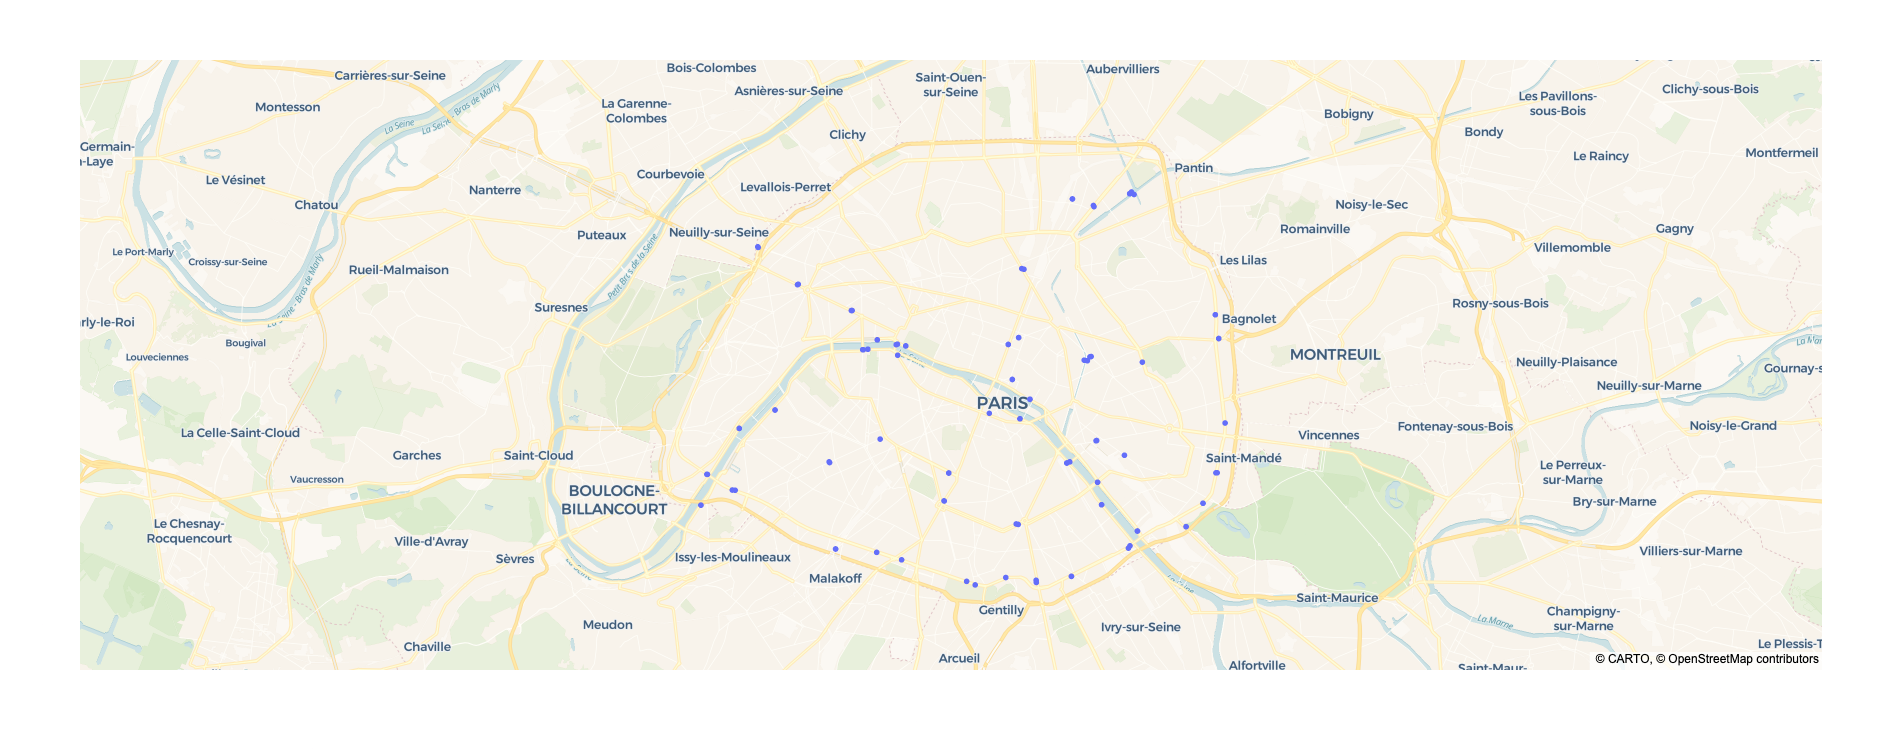

In [44]:
df_map = df[["Nom du compteur", "latitude", "longitude"]].drop_duplicates()
px.scatter_map(df_map, lat='latitude', lon='longitude', center={"lat":48.86, "lon": 2.335}, hover_name="Nom du compteur", width=800, height=750, zoom=11.3)

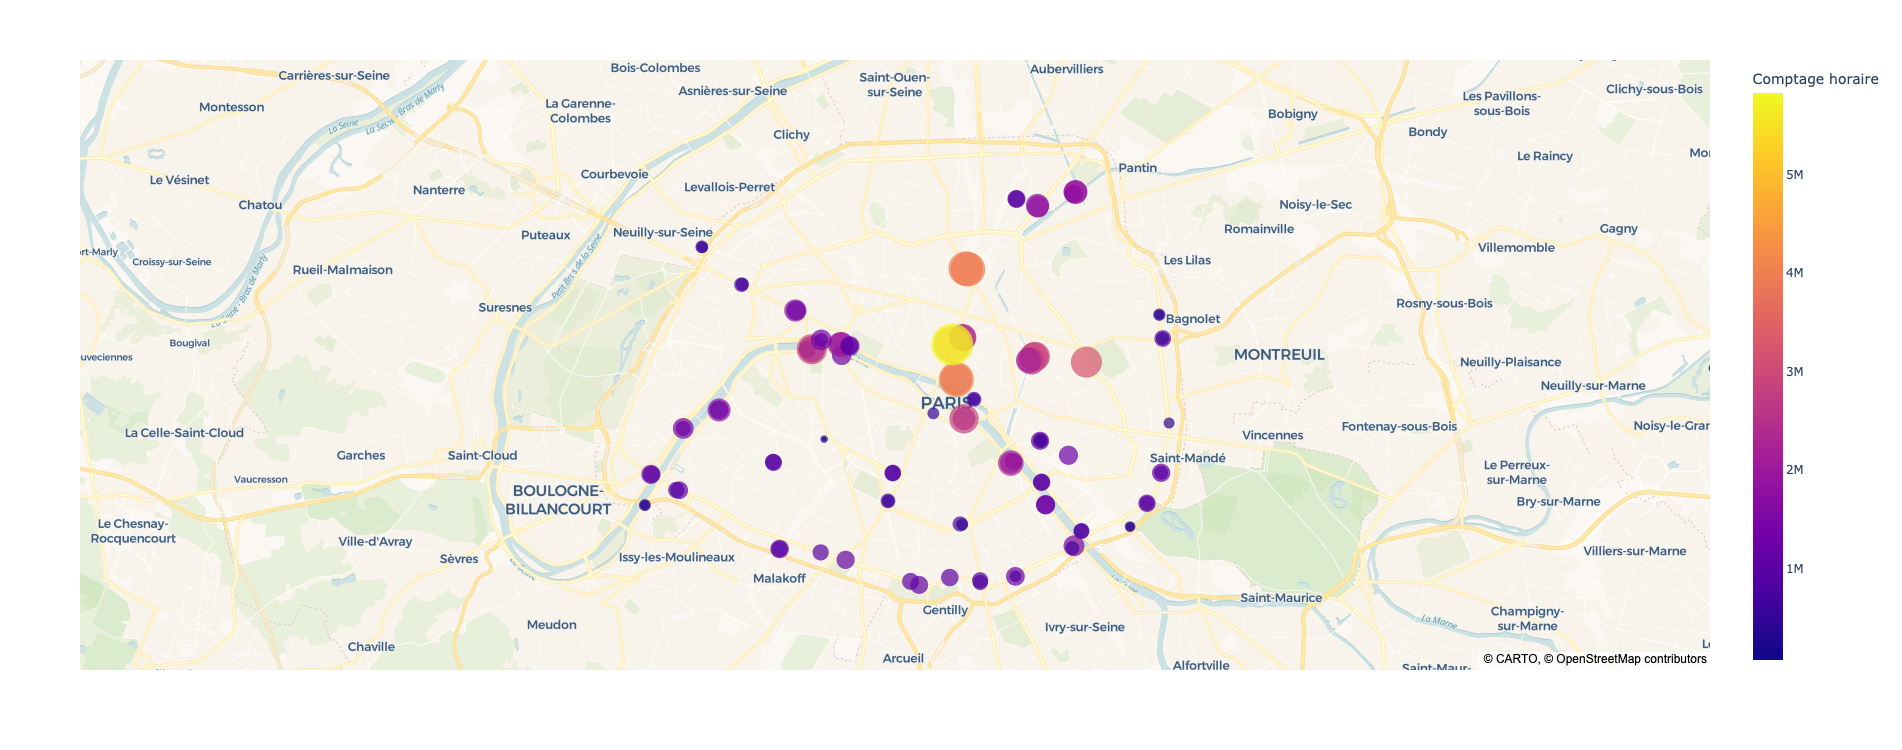

In [45]:
df_group = df.groupby("Nom du compteur", as_index=False).agg({
    "Comptage horaire": "sum",
    "latitude": "first",
    "longitude": "first"
})
fig = px.scatter_map(
    df_group,
    lat="latitude",
    lon="longitude",
    size="Comptage horaire",
    color="Comptage horaire",
    size_max=30,
    center={"lat": 48.86, "lon": 2.335},
    zoom=11.3,
    hover_name="Nom du compteur",
    width=800,
    height=750)
fig.show()

Localisation des compteurs du dataset.

Certains points sont très proches car ce sont des compteurs situés face à face sur la même rue (par ex "89 Boulevard de Magenta NO-SE" et "102 Boulevard de Magenta SE-NO")

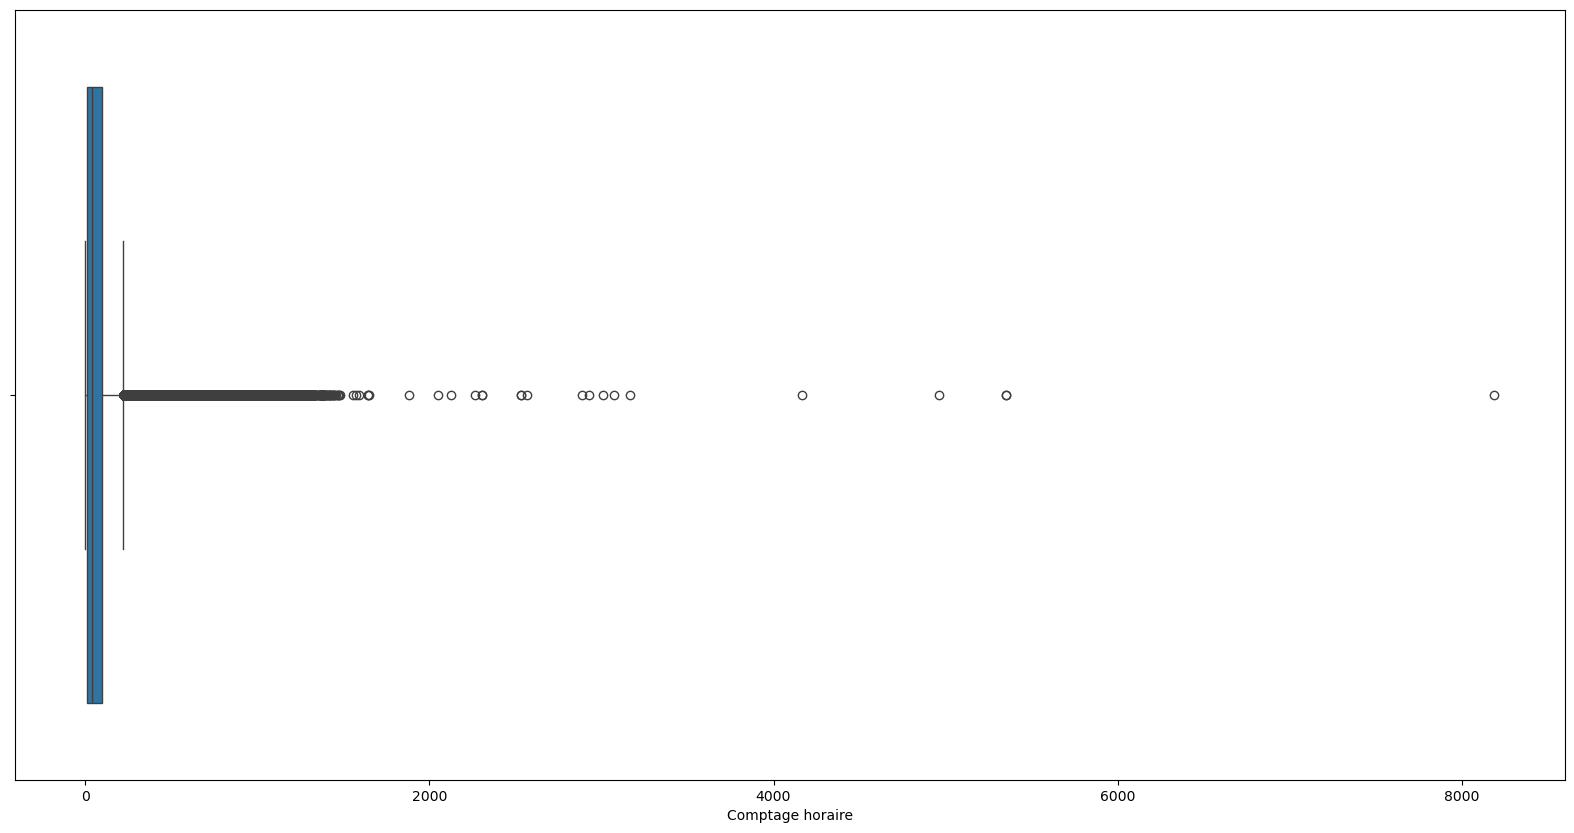

In [46]:
plt.figure(figsize=(20, 10))
sns.boxplot(df, x='Comptage horaire');

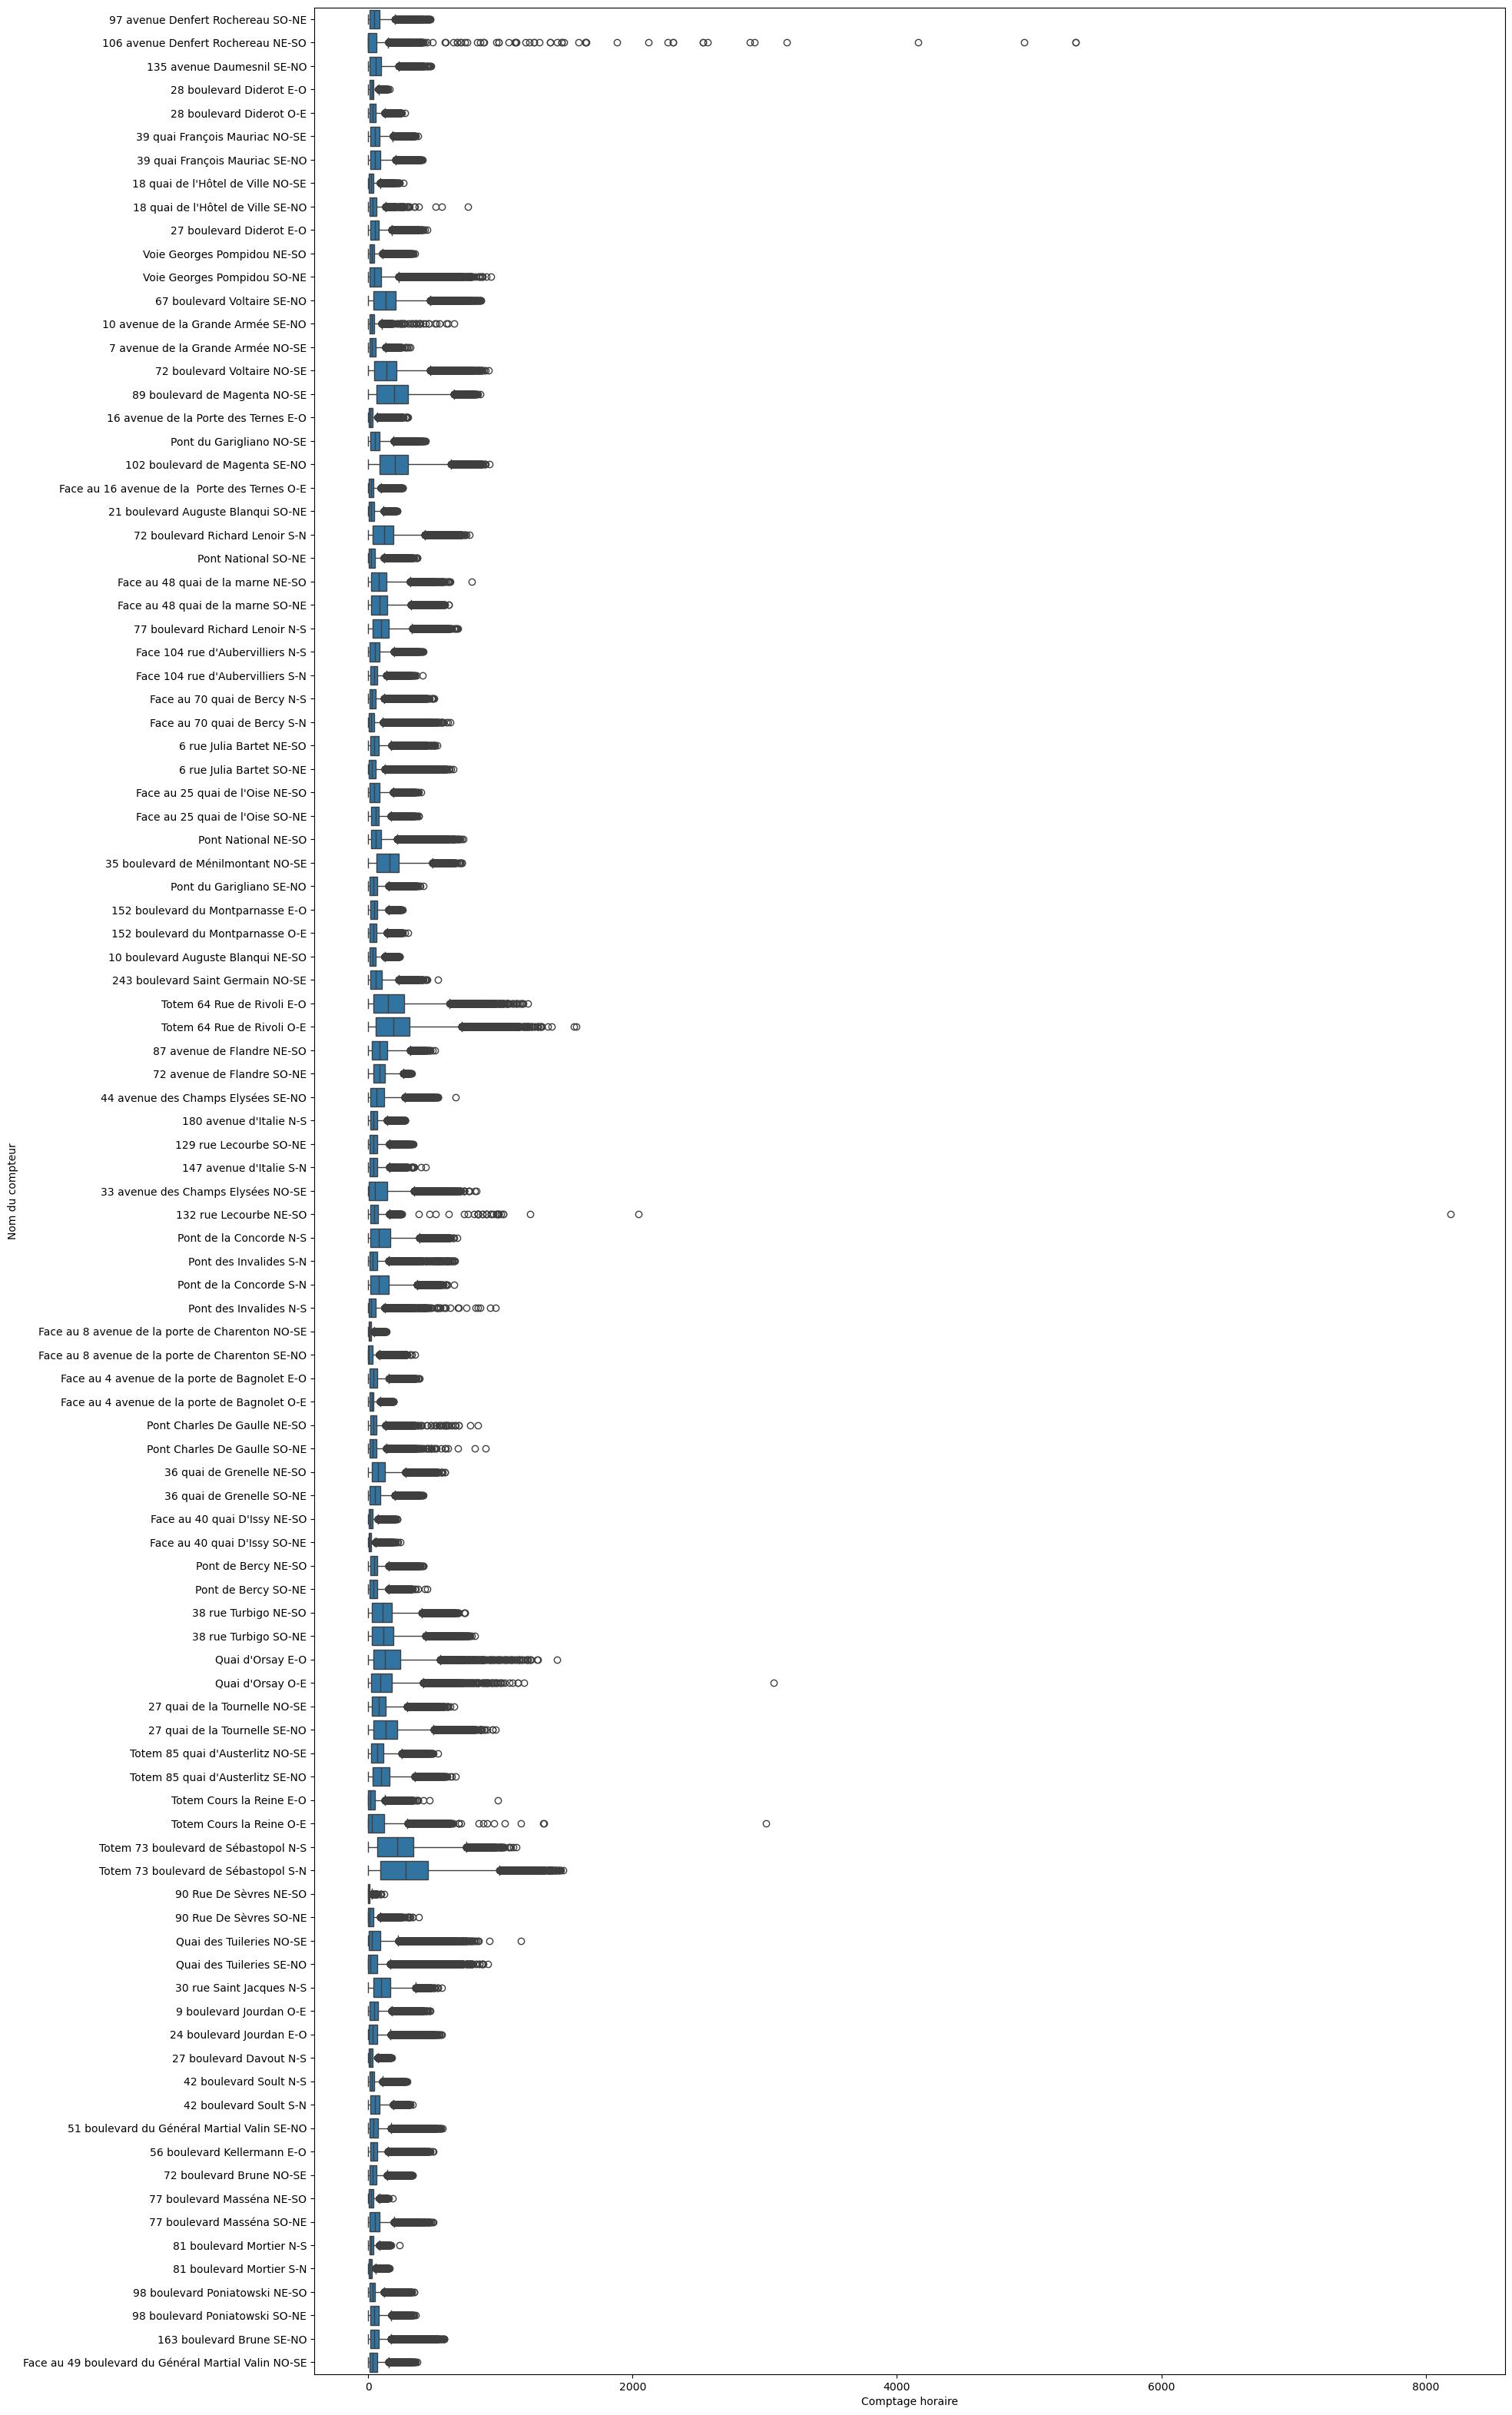

In [47]:
plt.figure(figsize=(20, 40))
sns.boxplot(df, x='Comptage horaire', y='Nom du compteur');

Il semble que `Comptage horaire` a beaucoup de valeurs extrêmes (notamment des comptages à >3000 à sur plusieurs compteurs).

Certains compteurs ont une moyenne proche de 0 (quoique difficile à vérifier avec l'échelle du graphique).

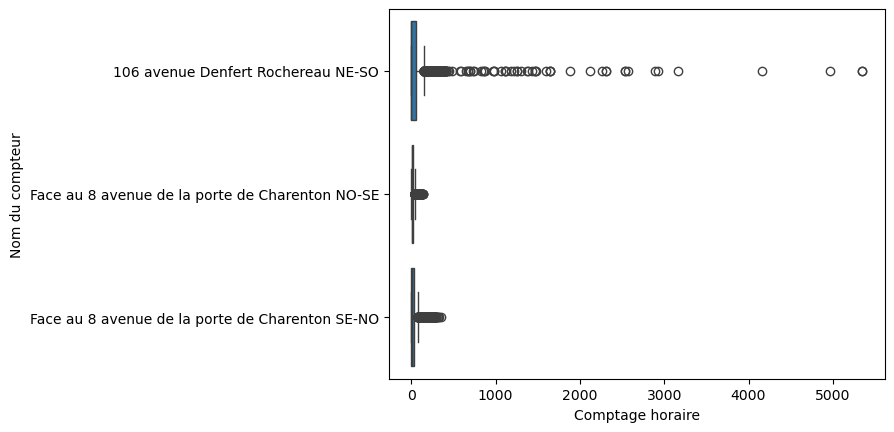

In [48]:
sns.boxplot(df.loc[df['Nom du compteur'].isin(["106 avenue Denfert Rochereau NE-SO", "Face au 8 avenue de la porte de Charenton NO-SE", "Face au 8 avenue de la porte de Charenton SE-NO"])], x='Comptage horaire', y='Nom du compteur');

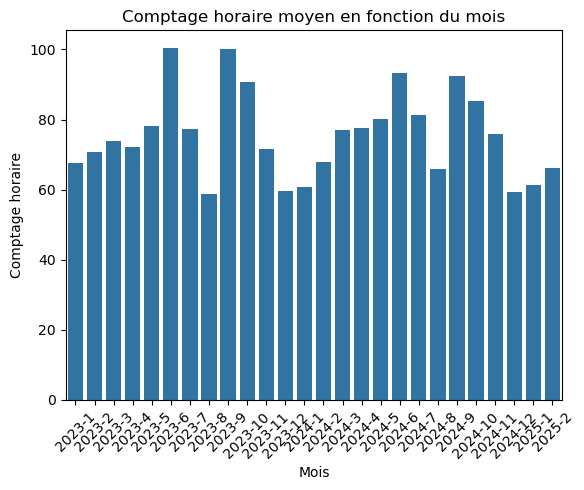

In [49]:
sns.barplot(df, x='mois_annee_comptage', y='Comptage horaire', errorbar=None)
plt.xlabel("Mois")
plt.xticks(rotation=45)
plt.title("Comptage horaire moyen en fonction du mois");

On constate une baisse du comptage en hiver (janvier et décembre) et au mois d'août. 

Cela est peut-être dû aux vacances, à certains évenements (JO de Paris en août) et à la météo (il fait plus froid en hiver, ce qui n'encourage pas la pratique cycliste).

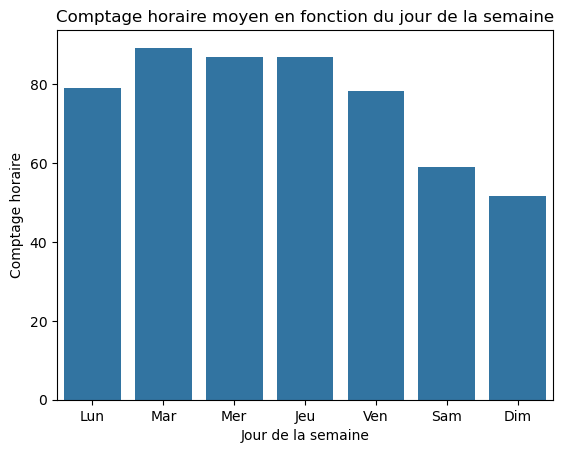

In [50]:
sns.barplot(df, x='weekday', y='Comptage horaire', errorbar=None)
plt.xlabel("Jour de la semaine")
plt.xticks(list(range(7)), ["Lun", "Mar", "Mer", "Jeu", "Ven", "Sam", "Dim"])
plt.title("Comptage horaire moyen en fonction du jour de la semaine");


On constate également plus de comptages du lundi au vendredi, ce qui correspond aux trajets domicile-travail.

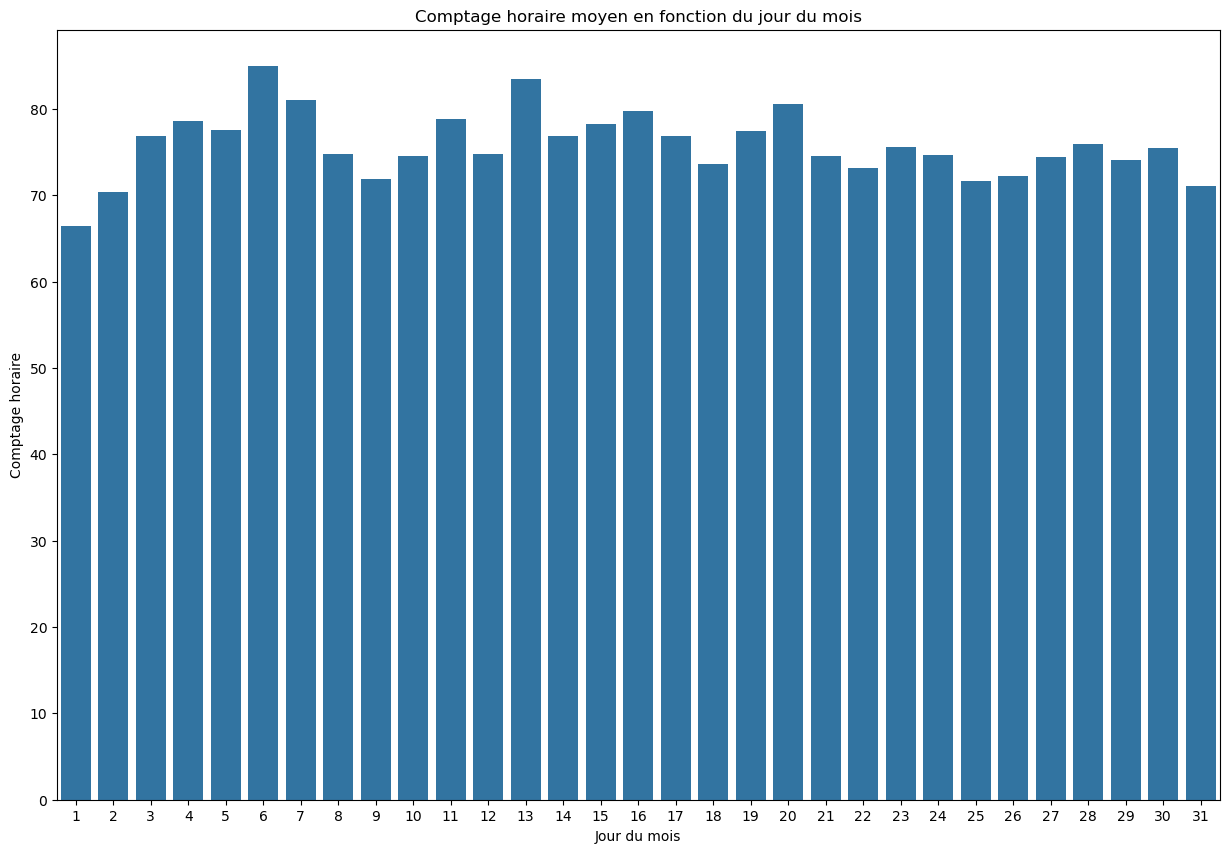

In [51]:
plt.figure(figsize=(15, 10))
sns.barplot(df, x='day', y='Comptage horaire', errorbar=None)
plt.xlabel("Jour du mois")
plt.title("Comptage horaire moyen en fonction du jour du mois");

Il est difficile de voir une tendance claire ici.

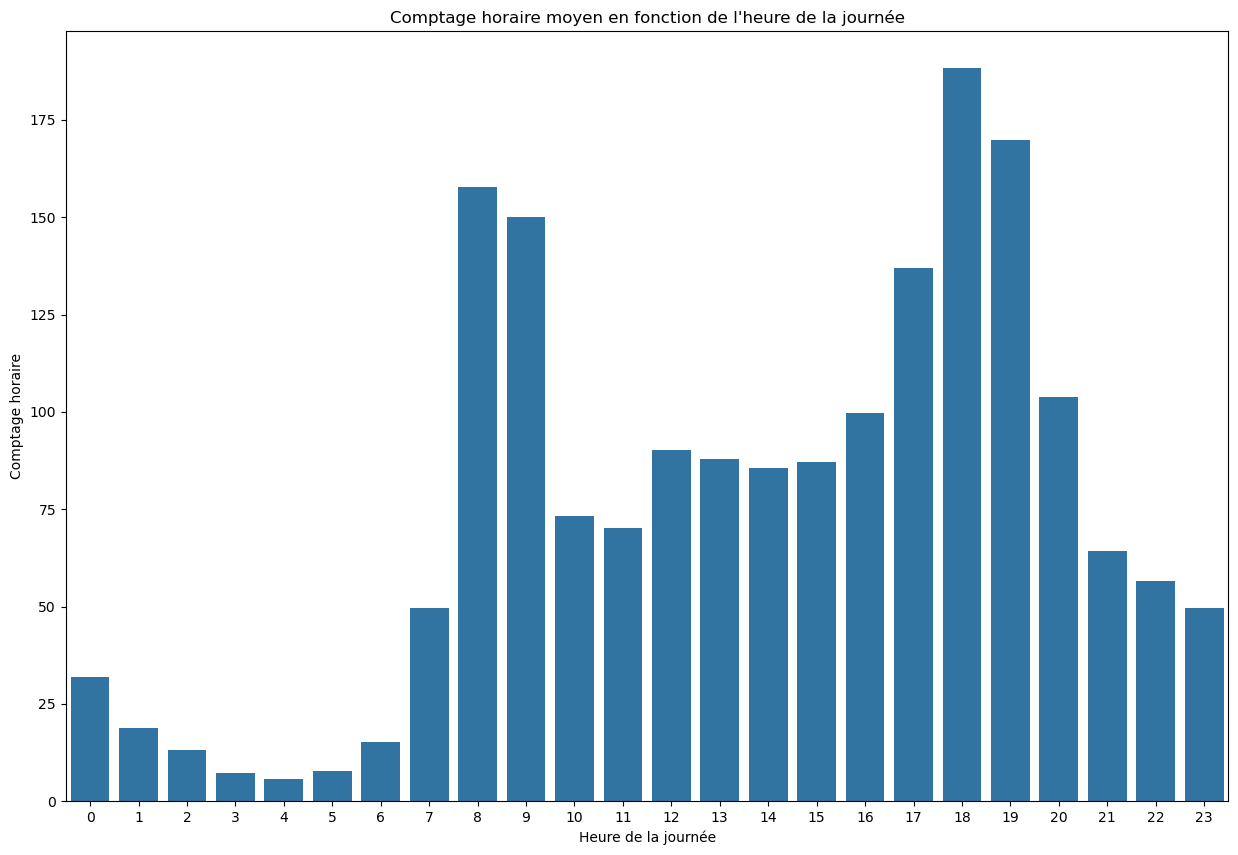

In [52]:
plt.figure(figsize=(15, 10))
sns.barplot(df, x='hour', y='Comptage horaire', errorbar=None)
plt.xlabel("Heure de la journée")
plt.title("Comptage horaire moyen en fonction de l'heure de la journée");

On remarque bien qu'il y a moins de comptage après 22h et avant 5h du matin.

Il y a des pics de comptage aux alentours de 8h-9h et de 17-19h, ce qui semble correspondre aux trajets domicile-travail.

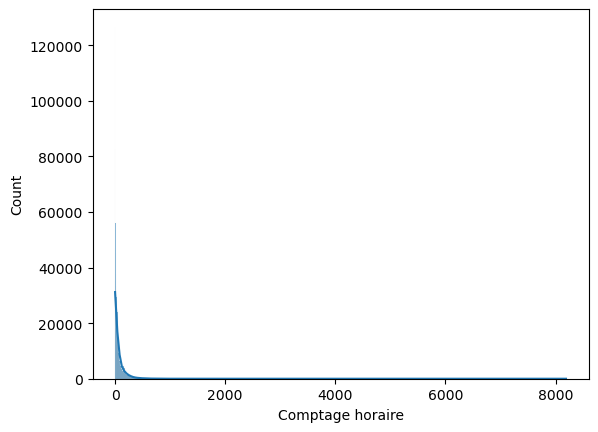

In [53]:
sns.histplot(df, x='Comptage horaire', kde=True);

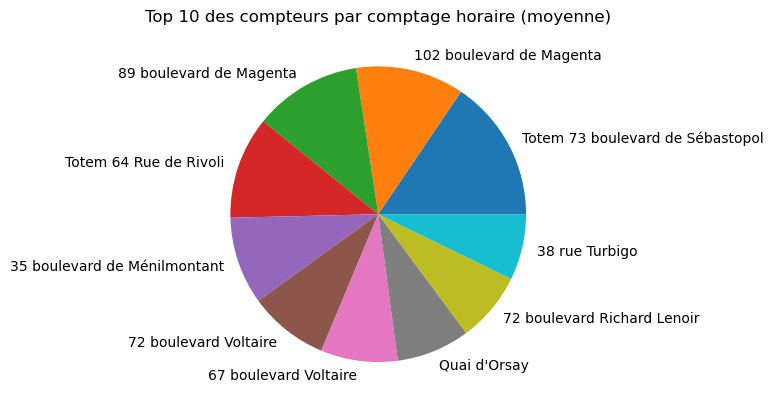

In [54]:
df_top_10 = df[['Nom du site de comptage', 'Comptage horaire']].groupby('Nom du site de comptage').mean().sort_values(by='Comptage horaire', ascending=False).head(10)
plt.pie(df_top_10['Comptage horaire'], labels=df_top_10.index)
plt.title('Top 10 des compteurs par comptage horaire (moyenne)');

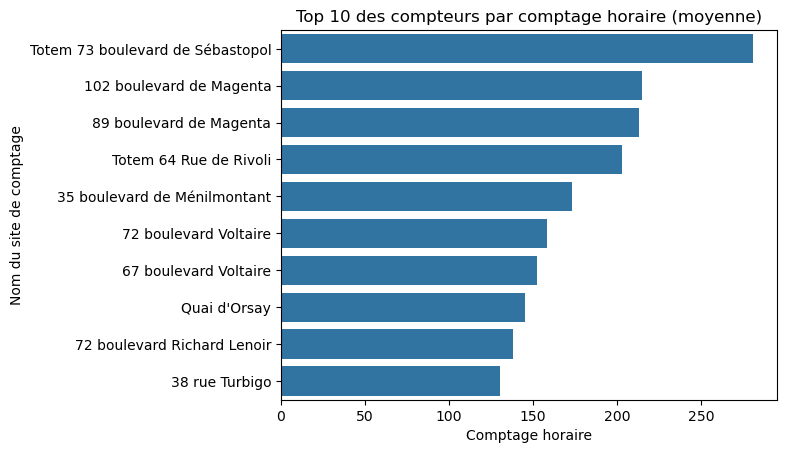

In [55]:
sns.barplot(df_top_10, x='Comptage horaire', y='Nom du site de comptage')
plt.title('Top 10 des compteurs par comptage horaire (moyenne)');

## Tests ANOVA comptage horaire
On pose H0: Il n'y a pas d'effet significatif de l'heure de la journée sur le comptage horaire
et on pose H1: Il y a un effet significatif de l'heure de la journée sur le comptage horaire

In [56]:
import statsmodels.api
df_anova = df[['Comptage horaire', 'hour']].rename({'Comptage horaire': 'target'}, axis=1)
result = statsmodels.formula.api.ols('target ~ hour', data=df_anova).fit()
statsmodels.api.stats.anova_lm(result)

df        sum_sq       mean_sq              F  PR(>F)
hour            1.0  1.518361e+09  1.518361e+09  150412.466262     0.0
Residual  1797915.0  1.814932e+10  1.009465e+04            NaN     NaN

In [57]:
from scipy.stats import spearmanr
(coeff_corr_s, p_val_s) = spearmanr(df_anova['target'], df_anova['hour'])
print('spearman', coeff_corr_s, p_val_s)

spearman 0.46394372962387426 0.0


In [58]:
df_anova = df[['Comptage horaire', 'weekday']].rename({'Comptage horaire': 'target'}, axis=1)
result = statsmodels.formula.api.ols('target ~ weekday', data=df_anova).fit()
statsmodels.api.stats.anova_lm(result)

df        sum_sq       mean_sq             F  PR(>F)
weekday         1.0  2.107933e+08  2.107933e+08  19478.364282     0.0
Residual  1797915.0  1.945689e+10  1.082192e+04           NaN     NaN

In [59]:
(coeff_corr_s, p_val_s) = spearmanr(df_anova['target'], df_anova['weekday'])
print('spearman', coeff_corr_s, p_val_s)

spearman -0.06640573957979273 0.0


In [60]:
df_anova = df[['Comptage horaire', 'month']].rename({'Comptage horaire': 'target'}, axis=1)
result = statsmodels.formula.api.ols('target ~ month', data=df_anova).fit()
statsmodels.api.stats.anova_lm(result)

df        sum_sq       mean_sq           F         PR(>F)
month           1.0  8.798224e+06  8.798224e+06  804.646659  5.767425e-177
Residual  1797915.0  1.965889e+10  1.093427e+04         NaN            NaN